In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
traffic = pd.read_parquet('../Phase2/data_sets_silver/traffic_cleaned.parquet')

In [3]:
weather = pd.read_parquet('../Phase2/data_sets_silver/weather_cleaned.parquet')

In [4]:
traffic.describe()

,traffic_id,date_time,vehicle_count,avg_speed_kmh,accident_count,visibility_m
count,4151.000000,4151,4151.000000,4151.000000,4151.000000,4151.000000
mean,14555.132498,2024-06-29 15:13:03.526860800,2503.085762,60.910974,4.386413,6198.059986
min,9001.000000,2024-01-01 04:53:00,1.000000,3.028226,0.000000,50.000000
25%,12641.000000,2024-03-28 17:39:00,1246.500000,31.396957,2.000000,2609.500000
50%,15351.000000,2024-06-28 01:09:00,2505.000000,60.995291,4.000000,5197.000000
75%,16604.500000,2024-09-30 19:45:30,3757.500000,89.214658,7.000000,7672.500000
max,17852.000000,2024-12-30 21:00:00,4999.000000,119.961300,9.000000,50000.000000
std,2525.251769,NaN,1450.806527,33.494657,2.941690,7659.755604


In [5]:
weather.describe()

,weather_id,date_time,temperature_c,humidity,rain_mm,wind_speed_kmh,visibility_m
count,3024.000000,3024,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,10157.293320,2024-06-30 01:24:53.611111168,20.237532,57.969577,27.290784,40.326014,5754.593585
min,5001.000000,2024-01-01 04:09:00,5.007249,10.000000,0.027336,0.007863,50.000000
25%,8651.000000,2024-03-26 20:45:00,12.799367,38.000000,13.108750,19.658138,2494.250000
50%,10713.000000,2024-06-30 15:45:00,20.267637,57.500000,25.380248,40.959270,5021.000000
75%,11950.250000,2024-10-01 09:49:15,27.756274,78.000000,37.544195,60.173435,7588.000000
max,13176.000000,2024-12-30 23:50:00,34.994298,99.000000,120.000000,79.988524,50000.000000
std,2236.930686,NaN,8.646245,23.841918,20.368702,23.200822,6562.021312


In [6]:
merged = traffic.merge(weather, on=['date_time', 'city'])

In [7]:
merged

,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m_x,weather_id,season,temperature_c,humidity,rain_mm,wind_speed_kmh,visibility_m_y,weather_condition
0,9371,2024-04-16 00:00:00,London,chelsea,767,49.255082,2,low,snowy,2609,11884,autumn,10.138782,92,16.228860,78.435567,7875,storm
1,11972,2024-07-09 11:00:00,London,southwark,1131,72.694131,0,unknown,damaged,9326,11095,winter,16.574840,96,7.246282,17.772967,2186,clear
2,15023,2024-04-21 04:00:00,London,unknown,2231,86.181583,3,low,damaged,1584,8731,summer,26.535432,94,3.910776,44.788610,4852,clear
3,14255,2024-05-14 14:00:00,London,kensington,1711,44.056048,3,medium,dry,6826,7574,winter,34.002649,21,7.871724,63.219103,9217,clear
4,15027,2024-12-14 01:00:00,London,unknown,4930,107.788422,4,high,unknown,3437,12904,spring,25.446224,32,16.279927,35.200485,8072,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,14748,2024-12-01 10:00:00,London,camden,1918,21.160514,9,medium,unknown,8826,10969,winter,28.218604,36,0.116069,18.595462,3922,rain
149,11413,2024-07-03 16:00:00,London,southwark,3441,86.477826,0,medium,unknown,5108,10995,winter,5.719630,80,30.229390,3.500153,4235,rain
150,11413,2024-07-03 16:00:00,London,southwark,3441,86.477826,0,medium,unknown,5108,11234,spring,23.672942,27,26.910938,62.974864,5947,storm
151,17775,2024-06-10 01:00:00,London,chelsea,2089,36.809758,9,unknown,damaged,8130,12285,spring,23.502536,40,33.311659,49.820466,3097,fog


In [8]:
merged.describe()

,traffic_id,date_time,vehicle_count,avg_speed_kmh,accident_count,visibility_m_x,weather_id,temperature_c,humidity,rain_mm,wind_speed_kmh,visibility_m_y
count,153.000000,153,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,14300.601307,2024-06-12 11:45:46.274509824,2664.071895,62.428453,4.385621,6112.352941,10569.660131,18.932957,57.137255,25.737975,40.591462,4919.366013
min,9098.000000,2024-01-01 08:00:00,14.000000,3.365133,0.000000,142.000000,5122.000000,5.159720,10.000000,0.116069,0.178432,54.000000
25%,12297.000000,2024-02-27 19:00:00,1427.000000,31.381554,2.000000,2357.000000,9823.000000,10.629849,36.000000,13.597567,17.772967,2423.000000
50%,15040.000000,2024-06-10 01:00:00,2887.000000,58.316996,4.000000,5148.000000,11085.000000,19.442389,57.000000,25.380248,43.764122,4852.000000
75%,16282.000000,2024-09-11 00:00:00,3911.000000,92.608671,7.000000,7754.000000,12086.000000,26.535432,77.000000,36.155178,62.498725,7202.000000
max,17775.000000,2024-12-28 23:00:00,4957.000000,119.422847,9.000000,50000.000000,13101.000000,34.930594,98.000000,120.000000,79.481132,9863.000000
std,2515.139123,NaN,1445.655866,34.861180,2.989288,7776.566386,2093.505984,8.881168,24.402615,17.565485,24.580675,2879.181423


In [9]:
# Removed outliers from the rain_mm column
merged_cleaned = merged[merged['rain_mm'] < 120]

In [10]:
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 152
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   traffic_id         151 non-null    int32         
 1   date_time          151 non-null    datetime64[ns]
 2   city               151 non-null    object        
 3   area               151 non-null    object        
 4   vehicle_count      151 non-null    int32         
 5   avg_speed_kmh      151 non-null    float64       
 6   accident_count     151 non-null    int32         
 7   congestion_level   151 non-null    object        
 8   road_condition     151 non-null    object        
 9   visibility_m_x     151 non-null    int32         
 10  weather_id         151 non-null    int32         
 11  season             151 non-null    object        
 12  temperature_c      151 non-null    float64       
 13  humidity           151 non-null    int32         
 14  rain_mm        

In [14]:
merged_cleaned['weather_condition'].unique()

array(['storm', 'clear', 'unknown', 'rain', 'snow', 'fog'], dtype=object)

In [15]:
# Replacing 'unknown' values from 'congestion_level' column randomly
np.random.seed(42)
choices = ['low', 'medium', 'high']
mask = merged_cleaned['congestion_level'] == 'unknown'
merged_cleaned.loc[mask, 'congestion_level'] = np.random.choice(choices, size=mask.sum())


# Replacing 'unknown' values from 'weather_condition' column randomly
np.random.seed(42)
choices = ['storm', 'clear', 'rain', 'snow', 'fog']
mask = merged_cleaned['weather_condition'] == 'unknown'
merged_cleaned.loc[mask, 'weather_condition'] = np.random.choice(choices, size=mask.sum())

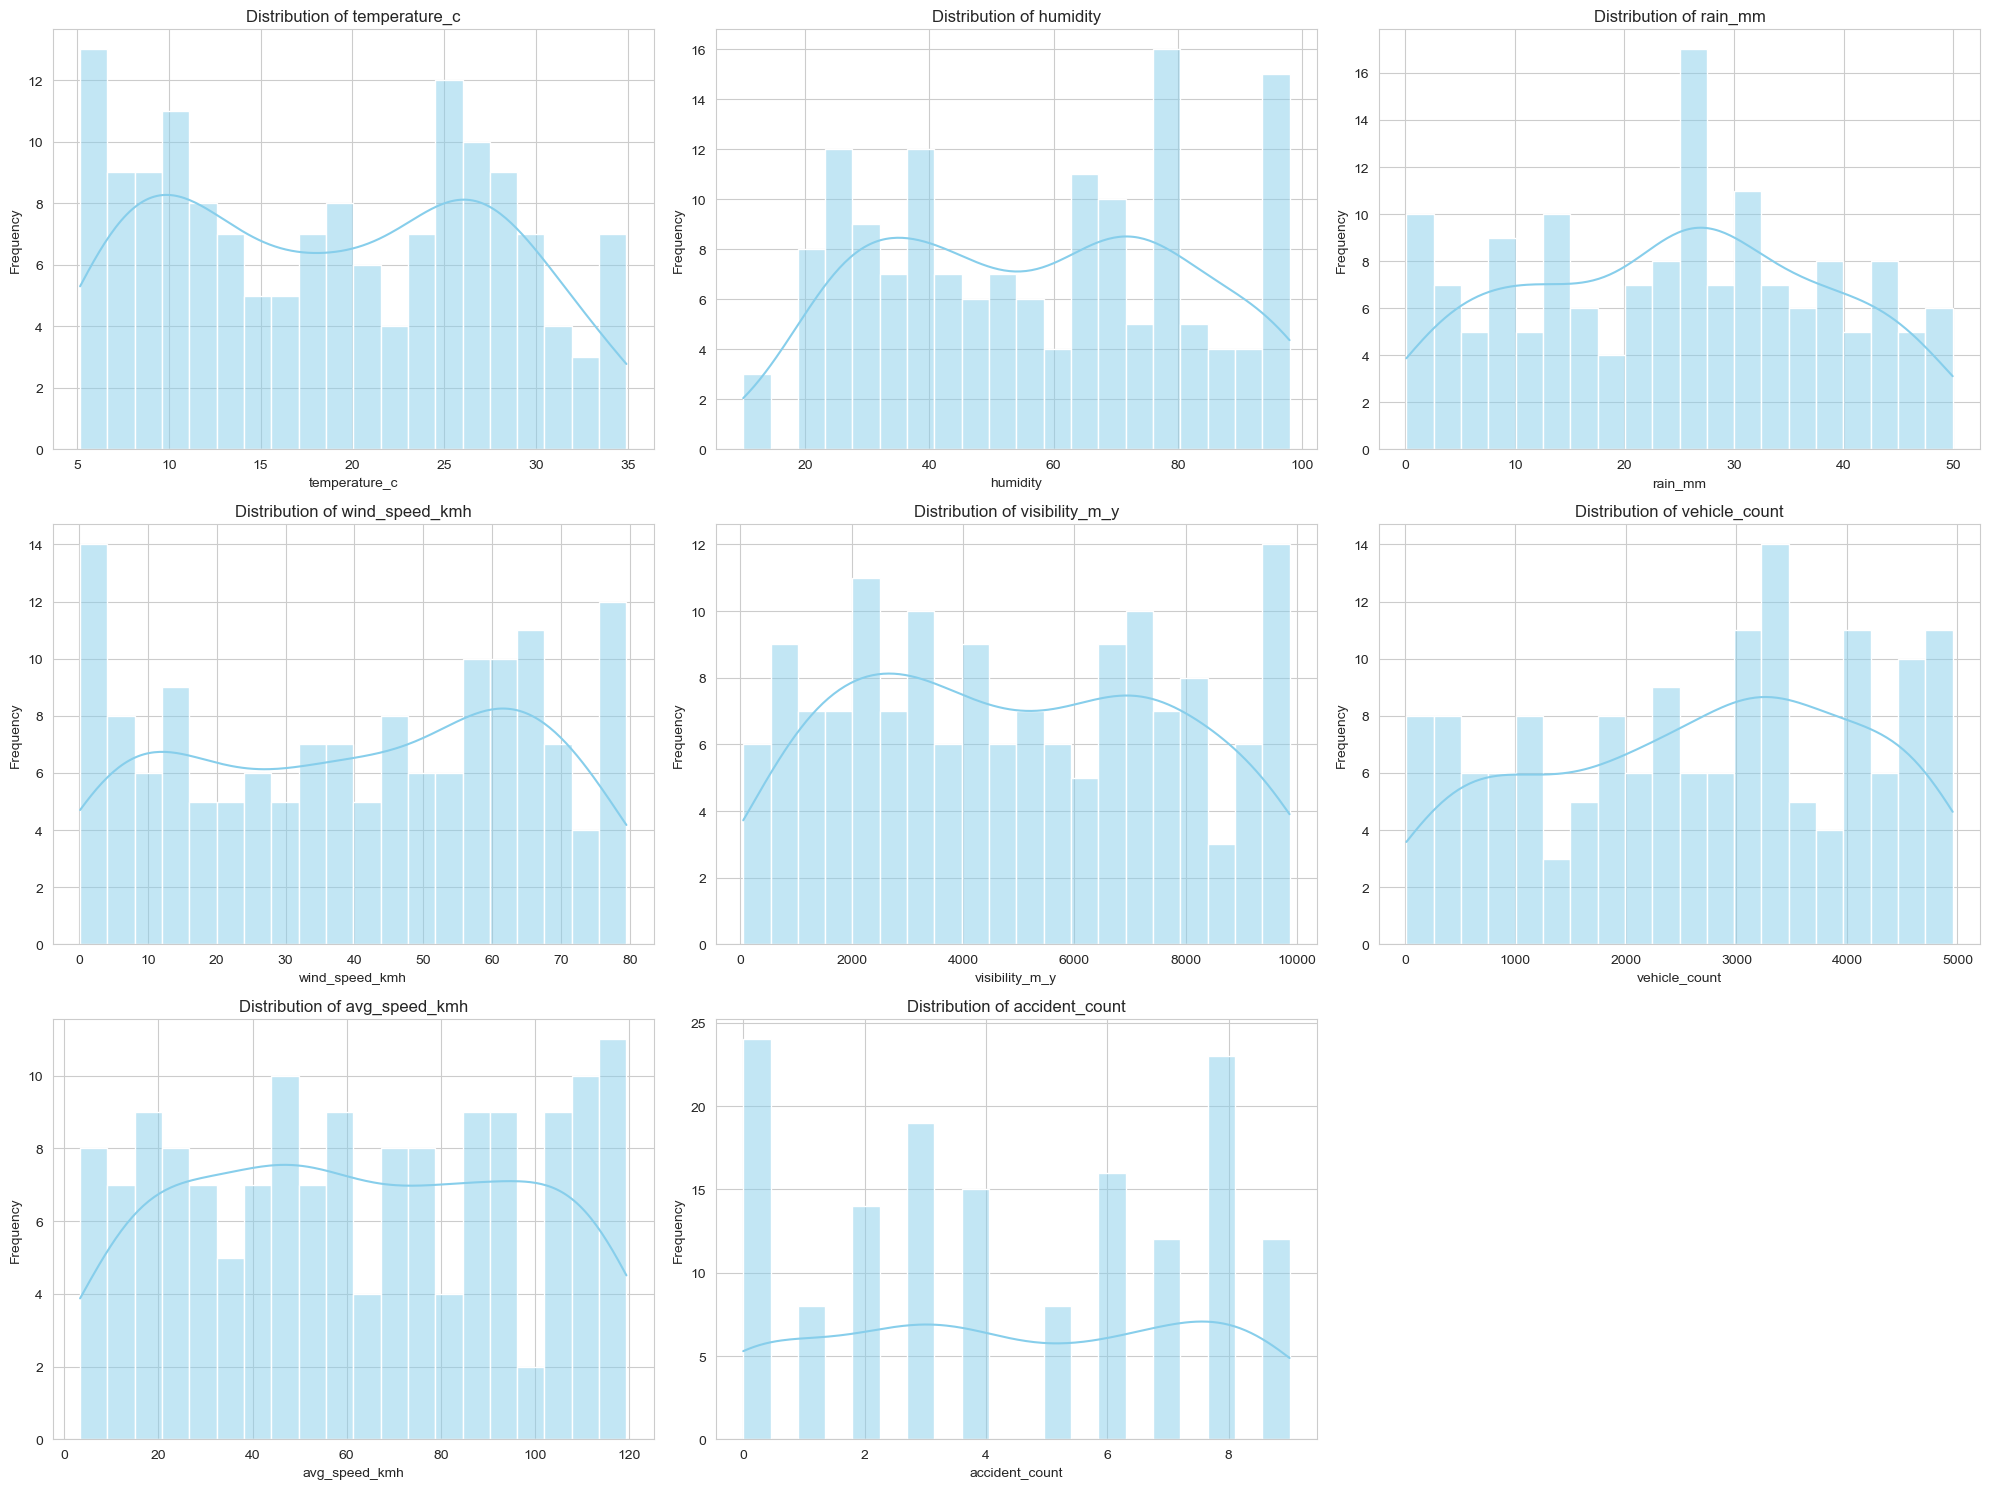

C:\Users\M EliteBook\AppData\Local\Temp\ipykernel_26008\3272945724.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_cleaned, x=col, order=merged_cleaned[col].value_counts().index, palette='viridis')
C:\Users\M EliteBook\AppData\Local\Temp\ipykernel_26008\3272945724.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_cleaned, x=col, order=merged_cleaned[col].value_counts().index, palette='viridis')


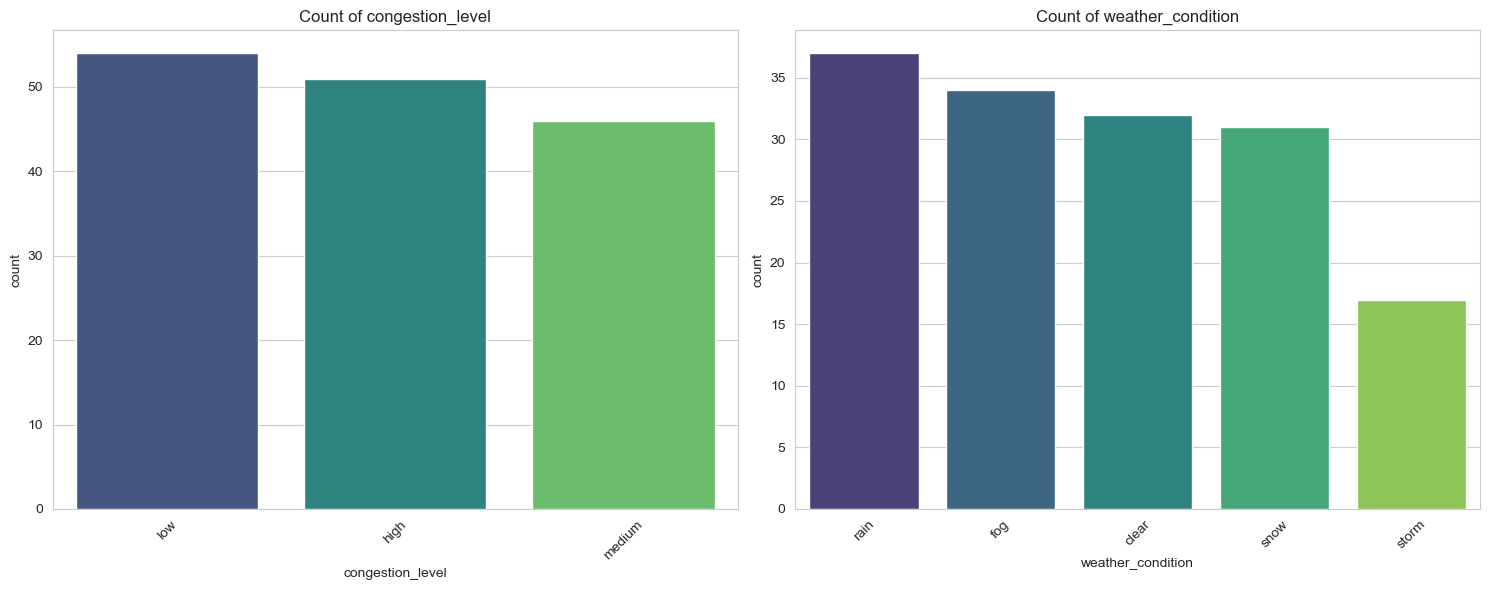

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'temperature_c', 'humidity', 'rain_mm', 
    'wind_speed_kmh', 'visibility_m_y', 
    'vehicle_count', 'avg_speed_kmh', 'accident_count'
]

categorical_cols = ['congestion_level', 'weather_condition']

sns.set_style("whitegrid")

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    
    sns.histplot(merged_cleaned[col], kde=True, bins=20, color='skyblue')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col) 
    plt.ylabel('Frequency') 

plt.tight_layout()
plt.savefig('numerical_distributions.png') 
plt.show() 

plt.figure(figsize=(15, 6))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    
    sns.countplot(data=merged_cleaned, x=col, order=merged_cleaned[col].value_counts().index, palette='viridis')
    
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

C:\Users\M EliteBook\AppData\Local\Temp\ipykernel_26008\1710297447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['high_accident_risk'] = (merged_cleaned['accident_count'] > 4).astype(int)


                   congestion_prob  accident_prob
scenario                                         
Baseline (Normal)         0.642942       0.469687
Extreme Cold              0.644522       0.508916
Extreme Heat              0.640269       0.427949
Heavy Rain                0.663793       0.595712
High Humidity             0.564602       0.502815
Low Visibility            0.688143       0.512316
Strong Winds              0.578566       0.471949


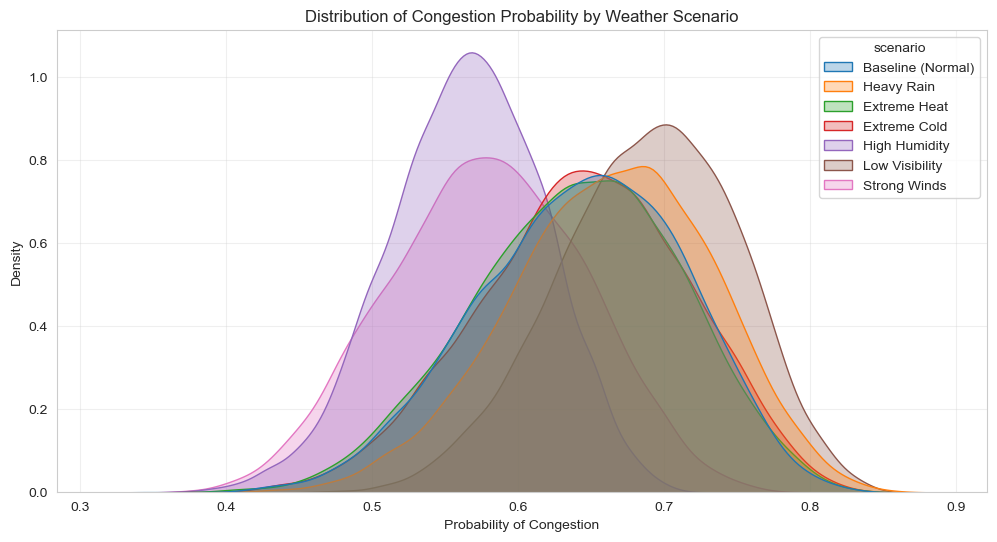

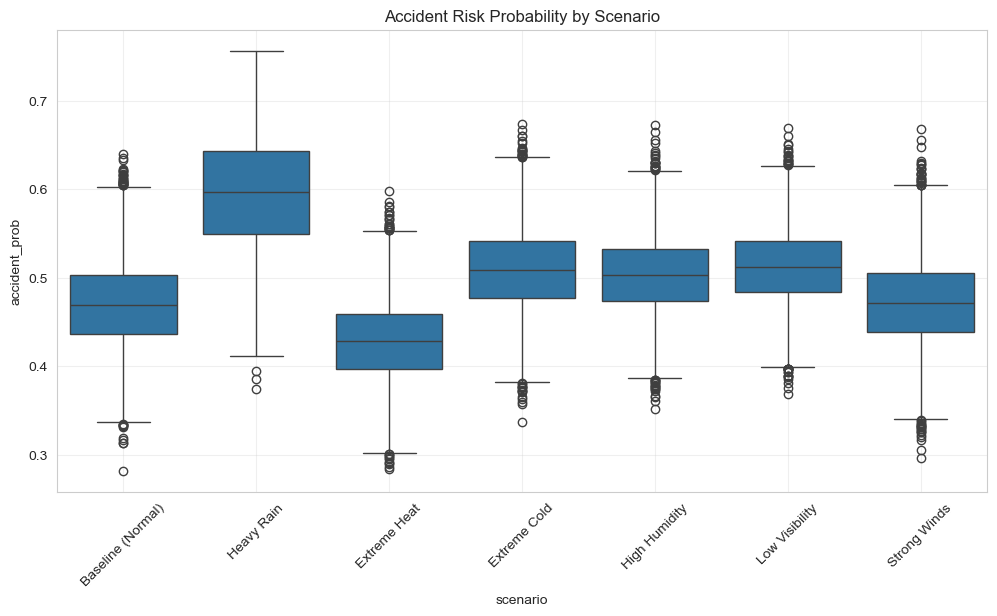

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

train_df = merged_cleaned[merged_cleaned['congestion_level'] != 'unknown'].copy()

train_df['is_congested'] = train_df['congestion_level'].apply(lambda x: 1 if x in ['high', 'medium'] else 0)

merged_cleaned['high_accident_risk'] = (merged_cleaned['accident_count'] > 4).astype(int)
y_acc_risk = merged_cleaned.loc[train_df.index, 'high_accident_risk']

features = ['temperature_c', 'humidity', 'rain_mm', 'wind_speed_kmh', 'visibility_m_y']
X = train_df[features]
y_cong = train_df['is_congested']


model_cong = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model_cong.fit(X, y_cong)

model_acc = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model_acc.fit(X, y_acc_risk)

def simulate_scenario(name, n_runs=10000, overrides={}):
    base_stats = merged_cleaned[features].describe()
    
    data = {}
    for col in features:
        mean = base_stats.loc['mean', col]
        std = base_stats.loc['std', col]
        data[col] = np.random.normal(mean, std, n_runs)
    
    for col, (low, high) in overrides.items():
        data[col] = np.random.uniform(low, high, n_runs)
        
    sim_df = pd.DataFrame(data)
    
    sim_df['humidity'] = sim_df['humidity'].clip(0, 100)
    sim_df['rain_mm'] = sim_df['rain_mm'].clip(0, None)
    sim_df['wind_speed_kmh'] = sim_df['wind_speed_kmh'].clip(0, None)
    sim_df['visibility_m_y'] = sim_df['visibility_m_y'].clip(0, None)
    
    sim_df['congestion_prob'] = model_cong.predict_proba(sim_df[features])[:, 1]
    sim_df['accident_prob'] = model_acc.predict_proba(sim_df[features])[:, 1]
    sim_df['scenario'] = name
    
    return sim_df

scenarios = [
    ("Baseline (Normal)", {}), 
    ("Heavy Rain", {'rain_mm': (40, 120)}),
    ("Extreme Heat", {'temperature_c': (35, 50)}), 
    ("Extreme Cold", {'temperature_c': (-10, 5)}), 
    ("High Humidity", {'humidity': (80, 100)}), 
    ("Low Visibility", {'visibility_m_y': (0, 500)}), 
    ("Strong Winds", {'wind_speed_kmh': (60, 100)}) 
]

all_results = []
for name, overrides in scenarios:
    all_results.append(simulate_scenario(name, overrides=overrides))

simulation_results = pd.concat(all_results, ignore_index=True)

simulation_results.to_csv('simulation_results.csv', index=False)
print(simulation_results.groupby('scenario')[['congestion_prob', 'accident_prob']].mean())

plt.figure(figsize=(12, 6))
sns.kdeplot(data=simulation_results, x='congestion_prob', hue='scenario', fill=True, alpha=0.3)
plt.title('Distribution of Congestion Probability by Weather Scenario')
plt.xlabel('Probability of Congestion')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=simulation_results, x='scenario', y='accident_prob')
plt.title('Accident Risk Probability by Scenario')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()